In [1]:
import numpy as np
import pandas as pd

# matplotlib and seaborn for plotting
import matplotlib
matplotlib.rcParams['figure.dpi'] = 120 #resolution
matplotlib.rcParams['figure.figsize'] = (8,6) #figure size

import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style('darkgrid')
color = sns.color_palette()

In [2]:
aisles = pd.read_csv('aisles.csv')
departments = pd.read_csv('departments.csv')
orders = pd.read_csv('orders.csv')
order_products_prior = pd.read_csv('order_products__prior.csv')
order_products_train = pd.read_csv('order_products__train.csv')
products = pd.read_csv('products.csv')

## 1 Orders Dataset

In [3]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [4]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB


In [5]:
#exploring the number of missing values per feature in percentage
print('Number of missing values: ', orders.isnull().values.sum())
print('Percent of missing values per feature: ') 
orders.isnull().sum() * 100 / len(orders)

Number of missing values:  206209
Percent of missing values per feature: 


order_id                  0.000000
user_id                   0.000000
eval_set                  0.000000
order_number              0.000000
order_dow                 0.000000
order_hour_of_day         0.000000
days_since_prior_order    6.027594
dtype: float64

In [6]:
len(orders.order_id.unique())

3421083

In [7]:
len(orders.user_id.unique())

206209

In [8]:
orders.eval_set.value_counts()

eval_set
prior    3214874
train     131209
test       75000
Name: count, dtype: int64

In [9]:
orders.order_number.describe().apply(lambda x: format(x, '.2f'))

count    3421083.00
mean          17.15
std           17.73
min            1.00
25%            5.00
50%           11.00
75%           23.00
max          100.00
Name: order_number, dtype: object

In [10]:
order_number = orders.groupby('user_id')['order_number'].max()
order_number = order_number.value_counts()

## 1.1 Check how many orders are there per customer?

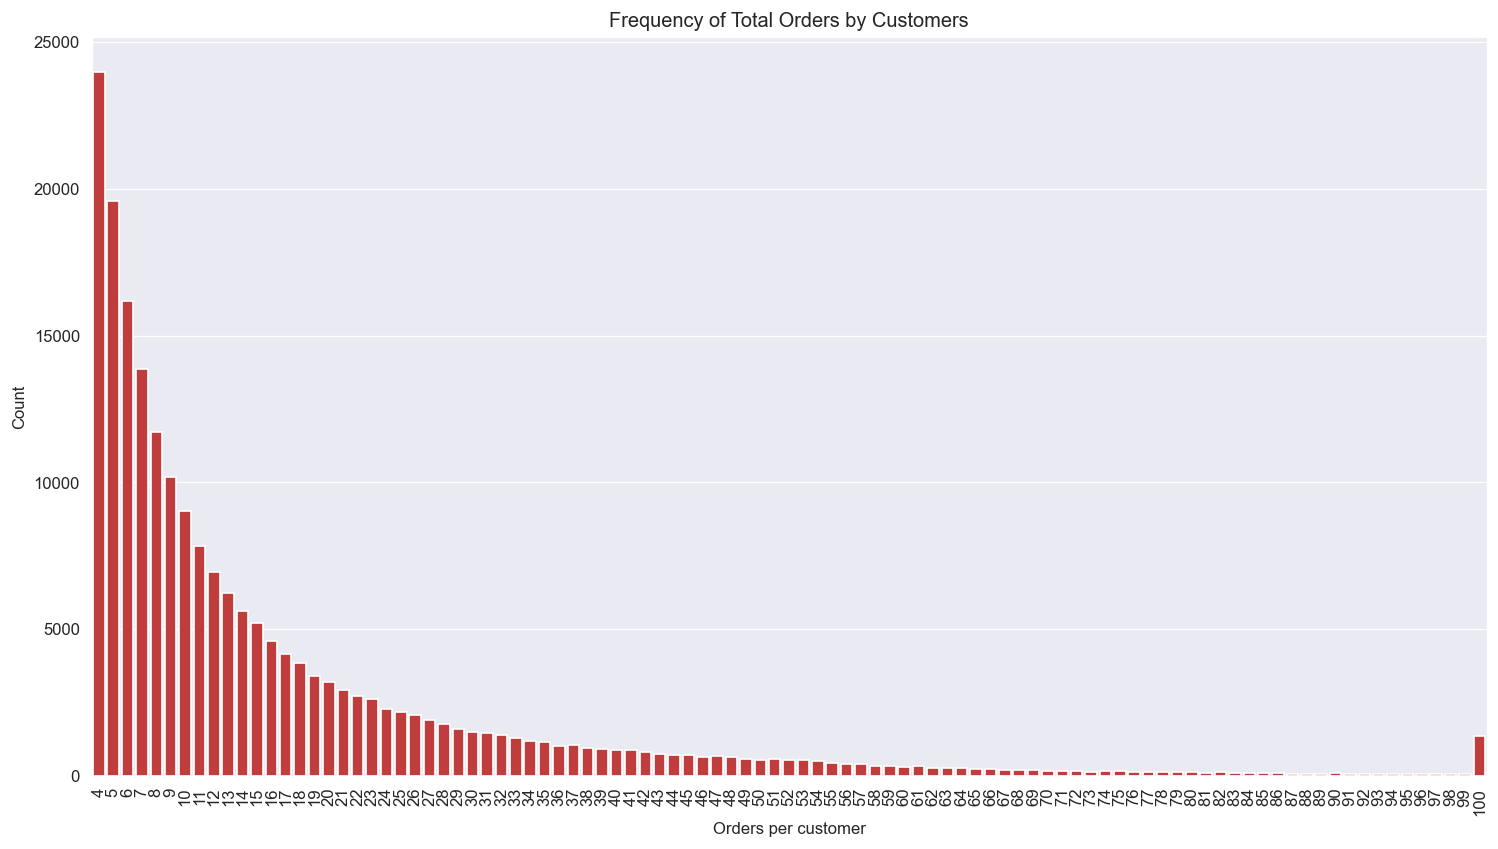

In [11]:
# Check how many orders are there per customer?

fig, ax = plt.subplots(figsize=(15,8))
ax = sns.barplot(x = order_number.index, y = order_number.values, color = color[3])
ax.set_xlabel('Orders per customer')
ax.set_ylabel('Count')
ax.xaxis.set_tick_params(rotation=90, labelsize=10)
ax.set_title('Frequency of Total Orders by Customers')
fig.savefig('Frequency of Total Orders by Customers.png')

### Most users make between 4 and 10 orders

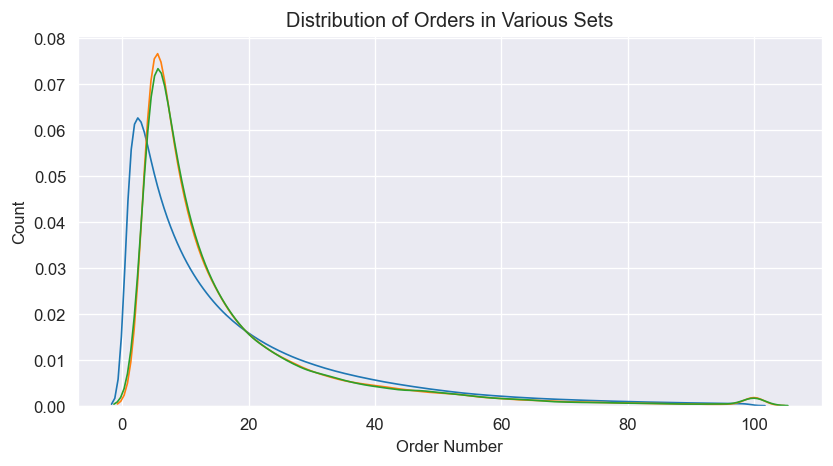

In [12]:
fig, ax = plt.subplots(figsize = (8,4))
ax = sns.kdeplot(orders.order_number[orders.eval_set == 'prior'], label = "Prior set", lw = 1)
ax = sns.kdeplot(orders.order_number[orders.eval_set == 'train'], label = "Train set", lw = 1)
ax = sns.kdeplot(orders.order_number[orders.eval_set == 'test'], label = "Test set", lw = 1)
ax.set_xlabel('Order Number')
ax.set_ylabel('Count')
ax.tick_params(axis = 'both', labelsize = 10)
ax.set_title('Distribution of Orders in Various Sets')
fig.savefig('Distribution of Orders in Various Sets.png')
plt.show()

## 1.2 When do people place their orders?

Most of the purchases are being made on days 0 and 1 (around 120K more orders are placed on these days). An assumption is made these days are Saturday and Sunday. There isn't a significant difference in number of orders on other days.

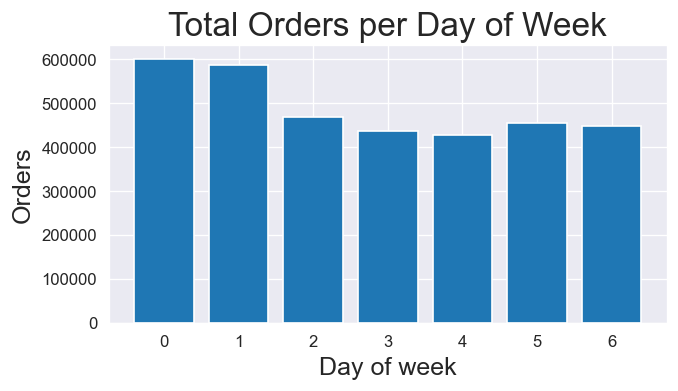

In [13]:
#0 is saturday and 1 is sunday
def count(x):
    return len(x)

yaxis = orders.groupby(["order_dow"]).order_dow.aggregate(count)
xaxis= [i for i in range(7)]

plt.figure(figsize=(6,3))
plt.bar(xaxis,yaxis.tolist())
plt.ylabel("Orders", fontsize=15)
plt.xlabel("Day of week", fontsize=15)
plt.title("Total Orders per Day of Week", fontsize=20)
plt.show()

## 1.3 At what hour do people order the most
Most orders are placed between 8am and 5pm

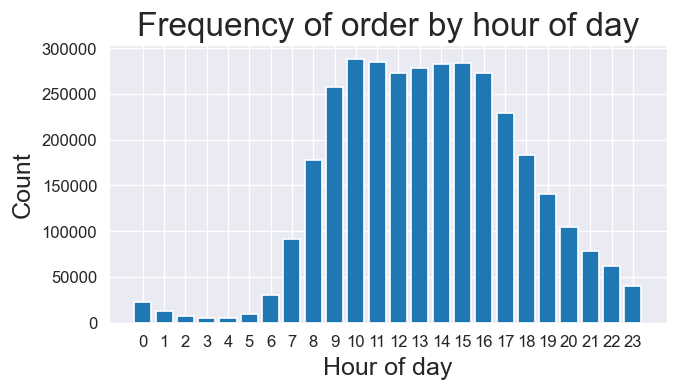

In [14]:
yaxis = orders.groupby(["order_hour_of_day"]).order_hour_of_day.aggregate(count)
xaxis= [i for i in range(24)]


plt.figure(figsize=(6,3))
plt.bar(xaxis,yaxis.tolist())
plt.ylabel("Count", fontsize=15)
plt.xlabel("Hour of day", fontsize=15)
plt.xticks(xaxis)
plt.title("Frequency of order by hour of day", fontsize=20)
plt.show()

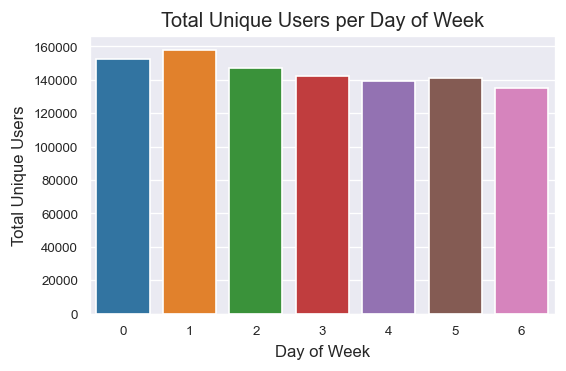

In [15]:
temp_df = orders.groupby('order_dow')['user_id'].nunique()

fig, ax = plt.subplots(figsize = (5,3))
ax = sns.barplot(x = temp_df.index, y = temp_df.values)
ax.set_xlabel('Day of Week', size = 10)
ax.set_ylabel('Total Unique Users', size = 10)
ax.tick_params(axis = 'both', labelsize = 8)
ax.set_title('Total Unique Users per Day of Week')
fig.savefig('Total Unique Users per Day of Week.png')
plt.show()

## 1.4 Freq Dist by Days since Prior Order
People usually order after 7 days, or after 30 days (NOTE: the data for days_since_prior_order was capped at 30)

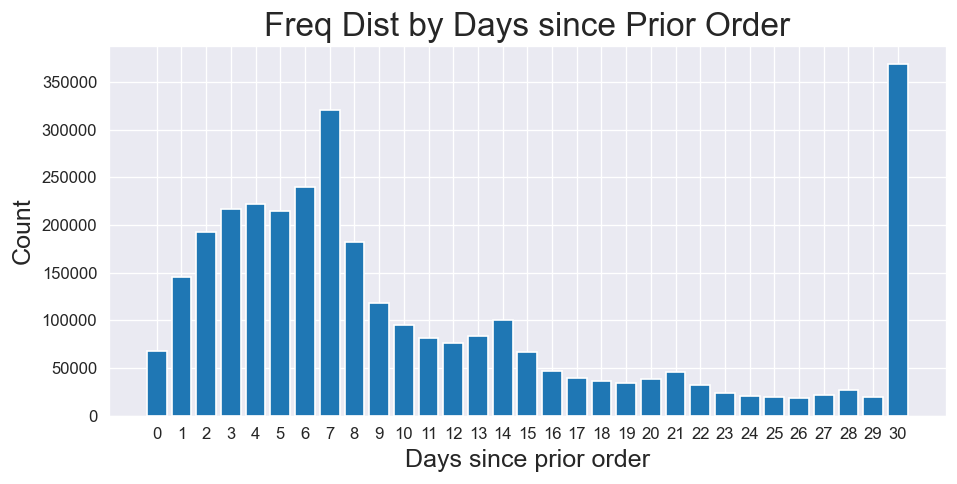

In [16]:
yaxis = orders.groupby(["days_since_prior_order"]).days_since_prior_order.aggregate(count)
xaxis= [i for i in range(31)]

plt.figure(figsize=(9,4))
plt.bar(xaxis, yaxis.tolist())
plt.ylabel("Count", fontsize=15)
plt.xlabel("Days since prior order", fontsize=15)
plt.xticks(xaxis)
plt.title("Freq Dist by Days since Prior Order", fontsize=20)
plt.show()

In [17]:
temp_df = orders.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()
temp_df = temp_df.pivot_table(index='order_dow', columns='order_hour_of_day', values='order_number')

temp_df.head()

order_hour_of_day,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
order_dow,,,,,,,,,,,,,,,,,,,,,
0,3936,2398,1409,963,813,1168,3329,12410,28108,40798,...,54552,53954,49463,39753,29572,22654,18277,14423,11246,6887
1,3674,1830,1105,748,809,1607,5370,16571,34116,51908,...,46764,46403,44761,36792,28977,22145,16281,11943,8992,5620
2,3059,1572,943,719,744,1399,4758,13245,24635,36314,...,37173,37469,37541,32151,26470,20084,15039,10653,8146,5358
3,2952,1495,953,654,719,1355,4562,12396,22553,32312,...,34773,35990,35273,30368,25001,19249,13795,10278,8242,5181
4,2642,1512,899,686,730,1330,4401,12493,21814,31409,...,33625,34222,34093,29378,24425,19350,14186,10796,8812,5645


## 1.5 Frequency of orders per weekday and its hour
People usually order on 0 & 1 (Saturdy & Sunday) days between 8am and 5pm

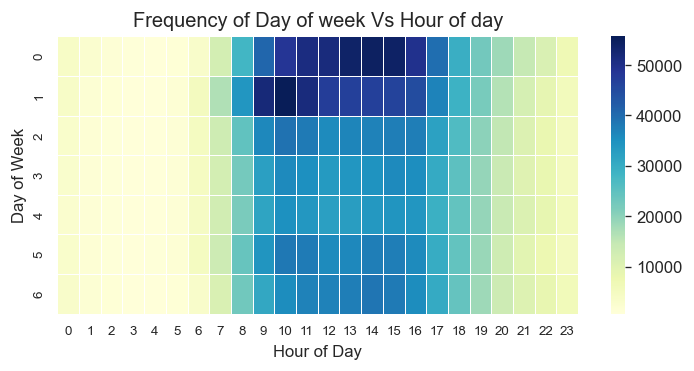

In [18]:
ax = plt.subplots(figsize=(7,3))
ax = sns.heatmap(temp_df, cmap="YlGnBu", linewidths=.5)
ax.set_title("Frequency of Day of week Vs Hour of day", size = 12)
ax.set_xlabel("Hour of Day", size = 10)
ax.set_ylabel("Day of Week", size = 10)
ax.tick_params(axis = 'both', labelsize = 8)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=10)
fig = ax.get_figure()
fig.savefig("Frequency of Day of week Vs Hour of day.png")
plt.show()

C:\Users\saurabh\AppData\Local\Temp\ipykernel_4152\836253910.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(orders.groupby('user_id')['order_id'].nunique(), binwidth=3, kde = True, palette = 'Set2')


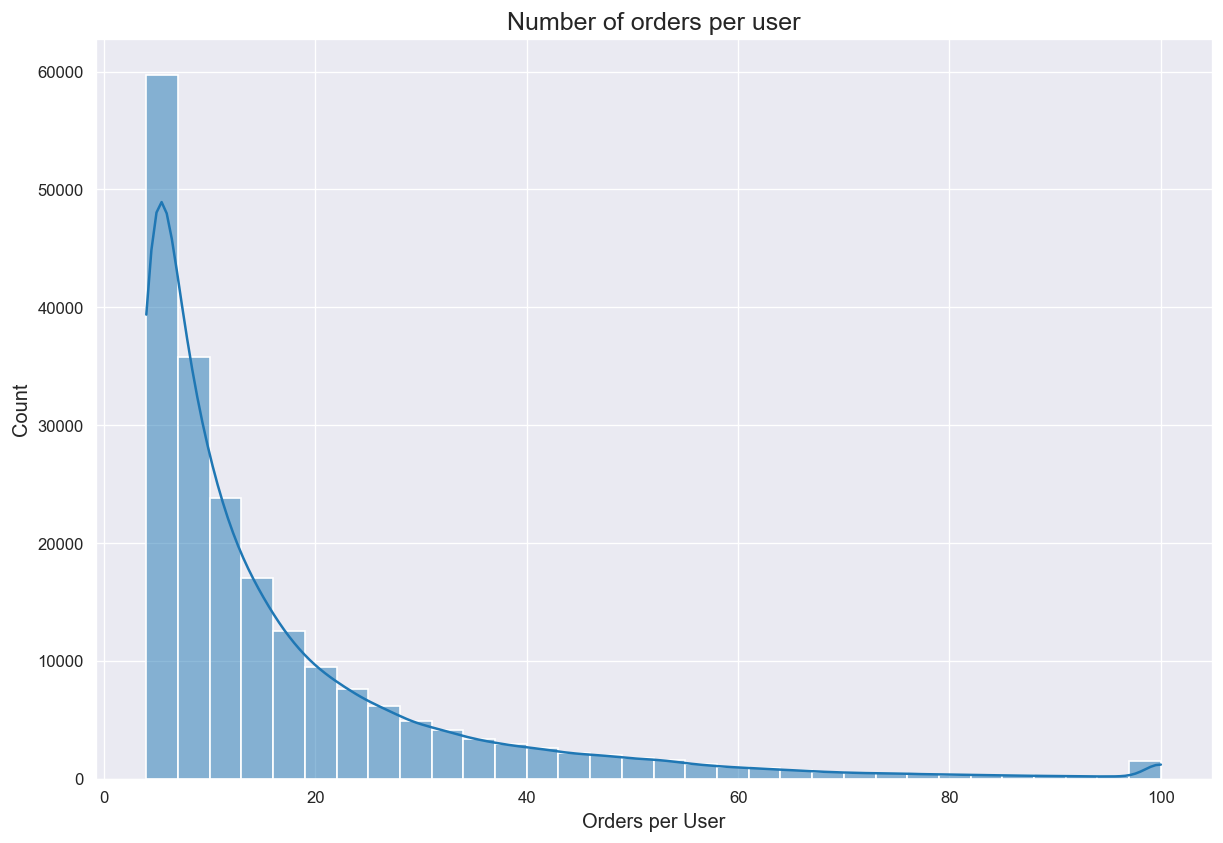

In [19]:
plt.figure(figsize=(12,8))
sns.histplot(orders.groupby('user_id')['order_id'].nunique(), binwidth=3, kde = True, palette = 'Set2')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Orders per User', fontsize=12)
plt.title('Number of orders per user', fontsize=15)
plt.show();

## 2 Products Dataset

In [20]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [21]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49688 non-null  int64 
 1   product_name   49688 non-null  object
 2   aisle_id       49688 non-null  int64 
 3   department_id  49688 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [22]:
#exploring the number of missing values per feature in percentage
print('Number of missing values: ', products.isnull().values.sum())
print('Percent of missing values per feature: ') 
products.isnull().sum() * 100 / len(products)

Number of missing values:  0
Percent of missing values per feature: 


product_id       0.0
product_name     0.0
aisle_id         0.0
department_id    0.0
dtype: float64

This file contains the list of total 49688 products and their aisle as well as department. The number of products in different aisles and different departments are different.

In [23]:
len(products.product_name.unique())

49688

In [24]:
len(products.aisle_id.unique())

134

In [25]:
len(products.department_id.unique())

21

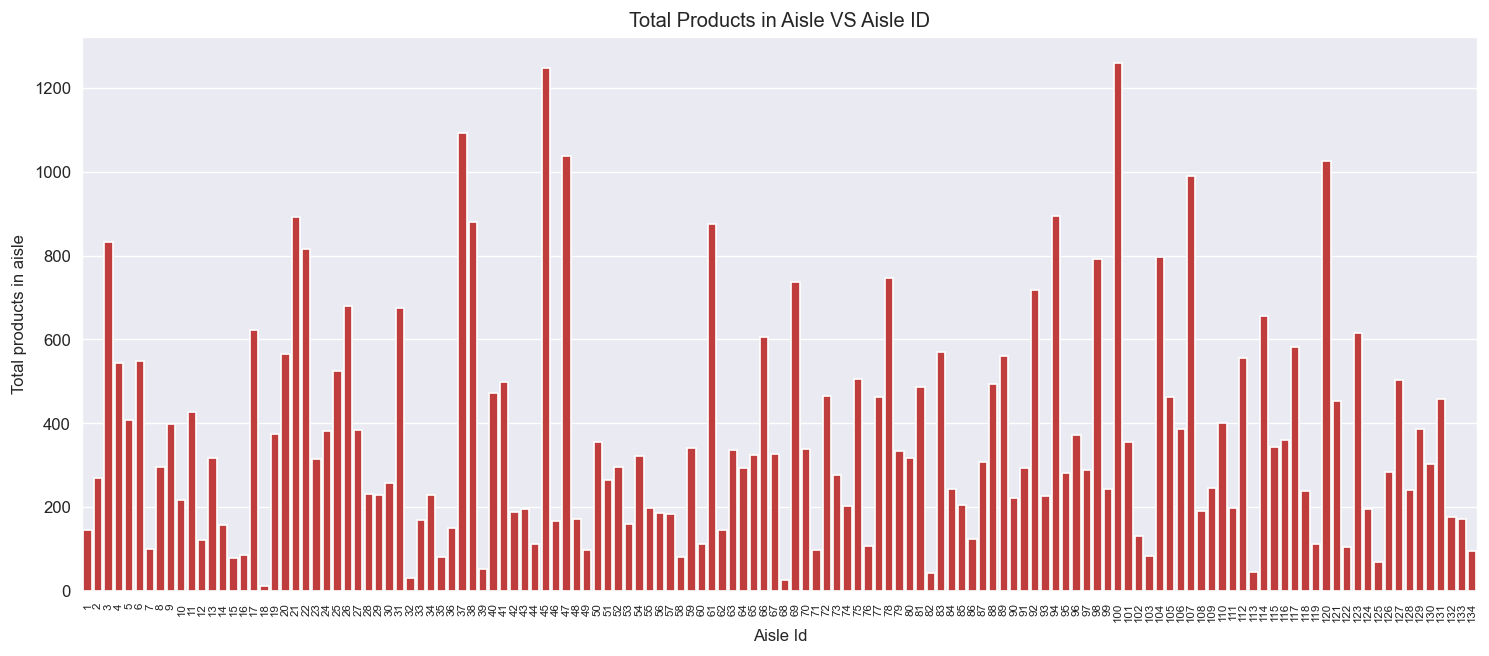

In [26]:
temp_df = products.groupby('aisle_id')['product_id'].count()

fig, ax = plt.subplots(figsize = (15,6))
ax = sns.barplot(x = temp_df.index, y = temp_df.values, color = color[3])
ax.set_xlabel('Aisle Id')
ax.set_ylabel('Total products in aisle')
ax.xaxis.set_tick_params(rotation=90, labelsize = 7)
ax.set_title('Total Products in Aisle VS Aisle ID', size = 12)
fig.savefig('Total Products in Aisle VS Aisle ID.png')

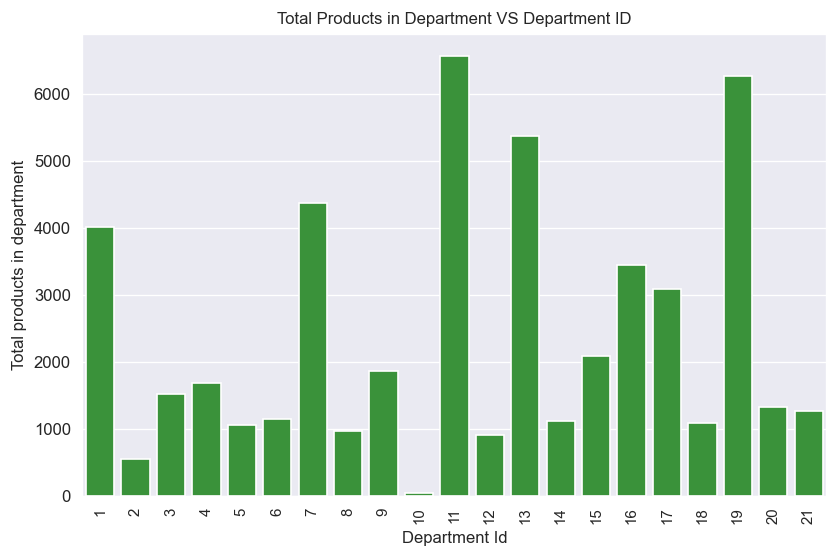

In [27]:
temp_df = products.groupby('department_id')['product_id'].count()

fig, ax = plt.subplots(figsize = (8,5))
ax = sns.barplot(x = temp_df.index, y = temp_df.values, color = color[2])
ax.set_xlabel('Department Id')
ax.set_ylabel('Total products in department')
ax.xaxis.set_tick_params(rotation=90, labelsize = 9)
ax.set_title('Total Products in Department VS Department ID', size = 10)
fig.savefig('Total Products in Department VS Department ID.png')

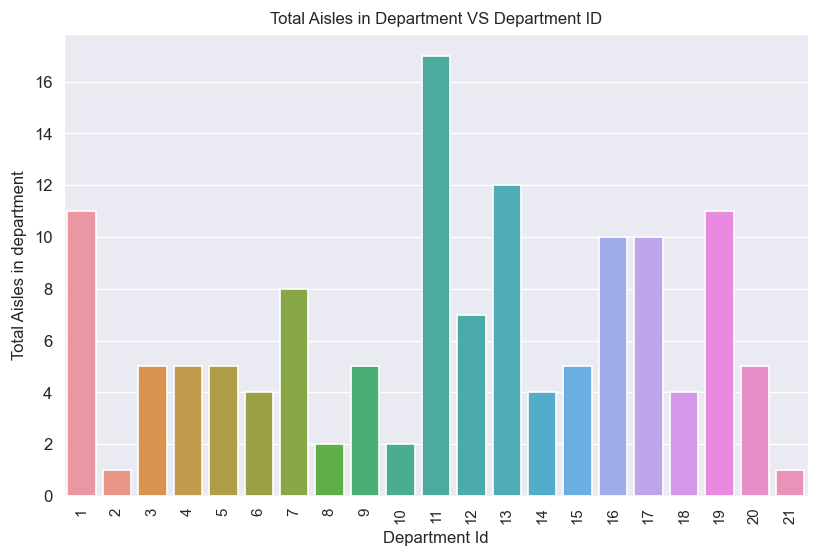

In [28]:
temp_df = products.groupby('department_id')['aisle_id'].nunique()

fig, ax = plt.subplots(figsize = (8,5))
ax = sns.barplot(x = temp_df.index, y = temp_df.values)
ax.set_xlabel('Department Id')
ax.set_ylabel('Total Aisles in department')
ax.xaxis.set_tick_params(rotation=90, labelsize = 9)
ax.set_title('Total Aisles in Department VS Department ID', size = 10)
fig.savefig('Total Aisles in Department VS Department ID.png')

## 3 Aisles Dataset

In [29]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [30]:
aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [31]:
#exploring the number of missing values per feature in percentage
print('Number of missing values: ', aisles.isnull().values.sum())
print('Percent of missing values per feature: ') 
aisles.isnull().sum() * 100 / len(aisles)

Number of missing values:  0
Percent of missing values per feature: 


aisle_id    0.0
aisle       0.0
dtype: float64

In [32]:
len(aisles.aisle.unique())

134

### aisles: This file contains different aisles and there are total 134 unique aisles.

In [33]:
aisles.aisle.unique()

array(['prepared soups salads', 'specialty cheeses',
       'energy granola bars', 'instant foods',
       'marinades meat preparation', 'other', 'packaged meat',
       'bakery desserts', 'pasta sauce', 'kitchen supplies',
       'cold flu allergy', 'fresh pasta', 'prepared meals',
       'tofu meat alternatives', 'packaged seafood', 'fresh herbs',
       'baking ingredients', 'bulk dried fruits vegetables',
       'oils vinegars', 'oral hygiene', 'packaged cheese', 'hair care',
       'popcorn jerky', 'fresh fruits', 'soap', 'coffee', 'beers coolers',
       'red wines', 'honeys syrups nectars', 'latino foods',
       'refrigerated', 'packaged produce', 'kosher foods',
       'frozen meat seafood', 'poultry counter', 'butter',
       'ice cream ice', 'frozen meals', 'seafood counter',
       'dog food care', 'cat food care', 'frozen vegan vegetarian',
       'buns rolls', 'eye ear care', 'candy chocolate', 'mint gum',
       'vitamins supplements', 'breakfast bars pastries',
       '

## 4 Departments Dataset

In [34]:
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [35]:
departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


In [36]:
#exploring the number of missing values per feature in percentage
print('Number of missing values: ', departments.isnull().values.sum())
print('Percent of missing values per feature: ') 
departments.isnull().sum() * 100 / len(departments)

Number of missing values:  0
Percent of missing values per feature: 


department_id    0.0
department       0.0
dtype: float64

### departments: 
This file contains different departments and there are total 21 unique departments.

In [37]:
len(departments.department.unique())

21

In [38]:
departments.department.unique()

array(['frozen', 'other', 'bakery', 'produce', 'alcohol', 'international',
       'beverages', 'pets', 'dry goods pasta', 'bulk', 'personal care',
       'meat seafood', 'pantry', 'breakfast', 'canned goods',
       'dairy eggs', 'household', 'babies', 'snacks', 'deli', 'missing'],
      dtype=object)

## 5 Order Products Dataset

In [39]:
order_products_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [40]:
order_products_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384617 entries, 0 to 1384616
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           1384617 non-null  int64
 1   product_id         1384617 non-null  int64
 2   add_to_cart_order  1384617 non-null  int64
 3   reordered          1384617 non-null  int64
dtypes: int64(4)
memory usage: 42.3 MB


In [41]:
#exploring the number of missing values per feature in percentage
print('Number of missing values: ', order_products_train.isnull().values.sum())
print('Percent of missing values per feature: ') 
order_products_train.isnull().sum() * 100 / len(order_products_train)

Number of missing values:  0
Percent of missing values per feature: 


order_id             0.0
product_id           0.0
add_to_cart_order    0.0
reordered            0.0
dtype: float64

In [42]:
len(order_products_train.order_id.unique())

131209

In [43]:
len(order_products_train.product_id.unique())

39123

In [44]:
order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [45]:
order_products_prior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 989.8 MB


In [46]:
#exploring the number of missing values per feature in percentage
print('Number of missing values: ', order_products_prior.isnull().values.sum())
print('Percent of missing values per feature: ') 
order_products_train.isnull().sum() * 100 / len(order_products_prior)

Number of missing values:  0
Percent of missing values per feature: 


order_id             0.0
product_id           0.0
add_to_cart_order    0.0
reordered            0.0
dtype: float64

In [47]:
len(order_products_prior.order_id.unique())

3214874

In [48]:
len(order_products_prior.product_id.unique())

49677

## 5.1 What is the proportion between reordered and newly ordered items?
The proportion of reordered items is greater at almost 60%, which indicates the habit of ordering the same items


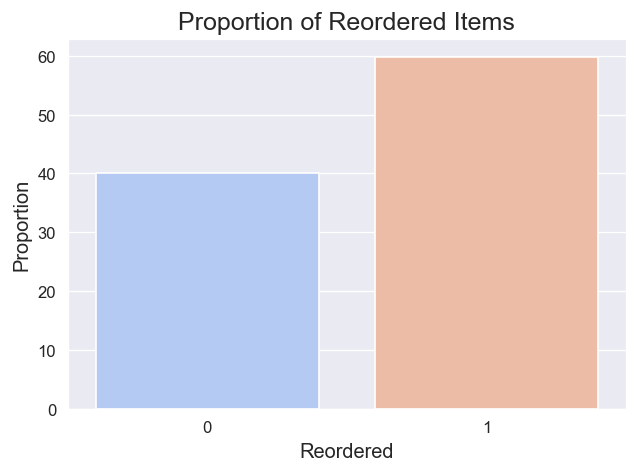

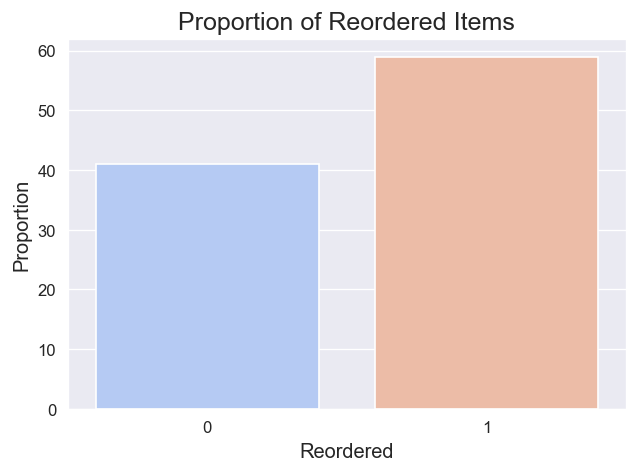

In [50]:
#visualizing the proportion of reordered items

prop_reorder = order_products_train.groupby('reordered')['add_to_cart_order'].count().reset_index()
prop_reorder['proportion'] = prop_reorder['add_to_cart_order'] * 100 / order_products_train['add_to_cart_order'].count()

plt.figure(figsize=(6,4))
sns.barplot(data = prop_reorder, x='reordered', y='proportion', palette='coolwarm')
plt.ylabel('Proportion', fontsize=12)
plt.xlabel('Reordered', fontsize=12)
plt.title('Proportion of Reordered Items', fontsize=15)
plt.show();


prop_reorder = order_products_prior.groupby('reordered')['add_to_cart_order'].count().reset_index()
prop_reorder['proportion'] = prop_reorder['add_to_cart_order'] * 100 / order_products_prior['add_to_cart_order'].count()

plt.figure(figsize=(6,4))
sns.barplot(data = prop_reorder, x='reordered', y='proportion', palette='coolwarm')
plt.ylabel('Proportion', fontsize=12)
plt.xlabel('Reordered', fontsize=12)
plt.title('Proportion of Reordered Items', fontsize=15)
plt.show();

In [51]:
#On an average, about 59% of the products in an order are re-ordered products.
# percentage of re-orders in prior set #
def count(x):
    return len(x)


prior_reorder = order_products_prior["reordered"].sum() / order_products_prior.shape[0]
print('percentage of re-orders in prior set',prior_reorder)
# percentage of re-orders in train set #
train_reorder = order_products_train["reordered"].sum() / order_products_train.shape[0]
print('percentage of re-orders in train set',train_reorder)

percentage of re-orders in prior set 0.5896974667922161
percentage of re-orders in train set 0.5985944127509629
